In [164]:
import numpy as np
from os import listdir
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

original_negative_image_folder = "./SIDE_VIEW_EYES/"
original_positive_image_folder = "./POSITIVE_ASTIGMATISM/"

grey_negative_image_folder =   "./GREY_NEGATIVE_EYES/"
grey_positive_image_folder = "./GREY_POSITIVE_EYES/"

grey_crop_negative_image_folder = "./GREY_CROPPED_NEGATIVE/"
grey_crop_positive_image_folder = "./GREY_CROPPED_POSITIVE/"


p_file_list = listdir(original_positive_image_folder)
n_file_list = listdir(original_negative_image_folder)

DIM_OF_IMG = 175


In [165]:
def convertToBW(fList, start_folder, dest_folder):
    for name in fList:
        img = Image.open(start_folder + name).convert('L')
        img.save(dest_folder + name)
        
def getCroppedImage(fList, start_folder, dest_folder):
    img_list = []
    for i in fList:

        curr_img = Image.open(start_folder + i)
        
        curr_tup = curr_img.size 
        gutter_x = ((curr_tup[0] - DIM_OF_IMG) / 2)
        gutter_y = ((curr_tup[1] - DIM_OF_IMG) / 2)
        curr_img = curr_img.crop((gutter_x, gutter_y, gutter_x + DIM_OF_IMG, gutter_y + DIM_OF_IMG ))
        curr_img.save(dest_folder + i)

        temp_img = mpimg.imread(dest_folder + i)
        img_list.append(temp_img)
    return img_list

def createDF(img_list, isNormal):
    x = []

    for i in img_list:
        temp = np.empty(0)
        for k in i:
            temp = np.append(temp, k)
        x.append(temp)


    X = pd.DataFrame(x)
    X.fillna(0, inplace=True)
    
    if isNormal == True:
        y = np.ones(len(img_list))
    elif isNormal == False:
        y = np.zeros(len(img_list))
    
    y = pd.DataFrame(y, columns=["isNormal"])

    X = X.join(y)
    return X

In [166]:
# POSITIVE Entries
convertToBW(p_file_list, original_positive_image_folder, grey_positive_image_folder)
pos_image_list = getCroppedImage(p_file_list, grey_positive_image_folder, grey_crop_positive_image_folder)
    
posDF = createDF(pos_image_list, False)
posDF.head()

,0,1,2,3,4,5,6,7,8,9,...,30791,30792,30793,30794,30795,30796,30797,30798,30799,isNormal
0,128.0,126.0,126.0,129.0,135.0,142.0,146.0,148.0,152.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,191.0,192.0,191.0,188.0,183.0,181.0,183.0,186.0,181.0,178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
# Negative Entries
convertToBW(n_file_list, original_negative_image_folder, grey_negative_image_folder)
neg_image_list = getCroppedImage(n_file_list, grey_negative_image_folder, grey_crop_negative_image_folder)
    
negDF = createDF(neg_image_list, True)
negDF.head()

,0,1,2,3,4,5,6,7,8,9,...,30967,30968,30969,30970,30971,30972,30973,30974,30975,isNormal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,55.0,25.0,30.0,65.0,56.0,49.0,80.0,90.0,94.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,141.0,143.0,145.0,146.0,145.0,145.0,146.0,148.0,147.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,106.0,109.0,107.0,101.0,101.0,105.0,104.0,99.0,97.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,148.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
dataframe = negDF.append(posDF)
dataframe.fillna(255, inplace=True)
dataframe[::20]

,0,1,2,3,4,5,6,7,8,9,...,30967,30968,30969,30970,30971,30972,30973,30974,30975,isNormal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,54.0,60.0,60.0,54.0,55.0,62.0,64.0,60.0,66.0,49.0,...,90.0,93.0,93.0,93.0,94.0,95.0,96.0,98.0,99.0,1.0
40,68.0,65.0,63.0,64.0,66.0,66.0,62.0,59.0,59.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
60,168.0,167.0,167.0,167.0,168.0,170.0,172.0,173.0,170.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,128.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,128.0,126.0,126.0,129.0,135.0,142.0,146.0,148.0,152.0,150.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


In [169]:
X = dataframe.drop(["isNormal"], axis=1)
y = dataframe["isNormal"]

In [170]:
X[::20]

,0,1,2,3,4,5,6,7,8,9,...,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,54.0,60.0,60.0,54.0,55.0,62.0,64.0,60.0,66.0,49.0,...,90.0,90.0,93.0,93.0,93.0,94.0,95.0,96.0,98.0,99.0
40,68.0,65.0,63.0,64.0,66.0,66.0,62.0,59.0,59.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,168.0,167.0,167.0,167.0,168.0,170.0,172.0,173.0,170.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,128.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,128.0,126.0,126.0,129.0,135.0,142.0,146.0,148.0,152.0,150.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [171]:
y[::20]

0     1.0
20    1.0
40    1.0
60    1.0
80    1.0
0     0.0
Name: isNormal, dtype: float64

In [206]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.9, random_state=2)

In [207]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, bootstrap = True, n_jobs=-1)

In [208]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [209]:
pred = rf.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred, y_test)
acc


0.79807692307692313

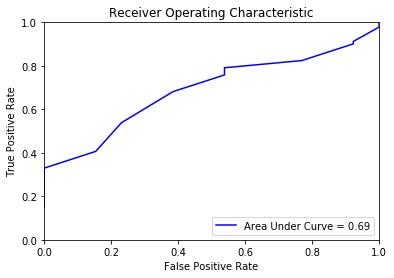

In [211]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

rfProbability = rf.predict_proba(X_test)
preds = rfProbability[:,1]
fpr, tpr, threshold = roc_curve(np.array(y_test), preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Area Under Curve = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [212]:

from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
lPred = logreg.predict(X_test)
acc = accuracy_score(lPred, y_test)
acc